# Сборный проект: Исследование рынка игр


Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
 Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Оглавление: <a id="toc"></a>

1. [Открытие данных](#step1)
2. [Предобработка](#step2)
3. [ Исследовательский анализ данных](#step3)
4. [Портреты игроков по странам](#step4)
5. [Проверка гипотез](#step5)
6. [Вывод](#step6)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
from scipy import stats as st

### Шаг 1. Откройте файл с данными и изучите общую информацию.<a id="step1"></a>

In [2]:
def data_show(data):
    display(data.info())
    display(data.sample(10))
    display(data.describe())


In [3]:
data_games=pd.read_csv('/datasets/games.csv')
data_show(data_games)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
5731,Taiko Drum Master: Don and Katsu's Space-Time ...,3DS,2014.0,Action,0.00,0.00,0.31,0.00,NaN,NaN,NaN
16372,Curse of the Amsterdam Diamond,DS,2012.0,Puzzle,0.00,0.01,0.00,0.00,NaN,NaN,NaN
13962,Adidas Power Soccer,PS,1996.0,Sports,0.02,0.01,0.00,0.00,NaN,NaN,NaN
13746,Catwoman,GBA,2004.0,Action,0.03,0.01,0.00,0.00,61.0,tbd,T
16381,Jan Sangoku Musou,PS2,2006.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN
2240,Disney Magical World,3DS,2013.0,Adventure,0.17,0.20,0.53,0.03,71.0,7.5,E
12741,Samurai Shodown Anthology,Wii,2008.0,Fighting,0.05,0.00,0.00,0.00,74.0,8.2,T
11509,Harry Potter and the Sorcerer's Stone,GC,2003.0,Action,0.06,0.02,0.00,0.00,62.0,8.3,E
8667,Street Racer,PS,1996.0,Racing,0.09,0.06,0.00,0.01,NaN,NaN,NaN
14019,Harry Potter and the Order of the Phoenix,PC,2007.0,Action,0.00,0.03,0.00,0.00,63.0,7.1,E10+


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


#### Видим пропущенные значения в столбцах name(2 значения), Year_of_Release,Genre, Critic_Score,User_Score,Rating
#### Аномальных значений не видно

### Шаг 2. Предобработка данных.<a id="step2"></a>

Приведем столбцы к нижнему регистру и заменим типа данных

In [4]:
data_games.columns=data_games.columns.str.lower()
columns_str=['name','platform','genre']
for columns in ['name','platform','genre']:
    data_games[columns]=data_games[columns].str.lower()

In [5]:
display(data_games.query('name.isna()'))


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Имеется 2 строки, где не указано название и жанр игры. Считаю, что данные игры не имеют ценности, поэтому удалим эти строки

In [6]:
data_games.query('year_of_release.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,fifa soccer 2004,ps2,NaN,sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,lego batman: the videogame,wii,NaN,action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe smackdown vs. raw 2006,ps2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,pdc world championship darts 2008,psp,NaN,sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,freaky flyers,gc,NaN,racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,inversion,pc,NaN,shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,hakuouki: shinsengumi kitan,ps3,NaN,adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Видим 269 строк, где порпущен год выпуска игры. Таких строк достаточно немного, поэтому можно их удалить

In [7]:
data_games.dropna(subset=['name', 'genre', 'year_of_release'], inplace=True)
data_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [8]:
data_games.loc[data_games['user_score'] == 'tbd', 'user_score'] = float('nan')
data_games['user_score']=data_games['user_score'].astype('float64')

tbd- означает, что рейтинг не определен, для удобства заменим его на nan

#### Посчитаем суммарные продажи во всех регионах

In [9]:
data_games['total_sales']=data_games['na_sales'] + data_games['eu_sales'] + data_games['jp_sales']+data_games['other_sales']

### Вывод: На этапе предобрабокти мы выполнили следующие действия:
###  1) Привели необходимые параметры к нижнему регистру
###  2) Удалили строки с пропущенным значениями в столбцах "название игры", "жанр" и "год выпуска"
###  3) В столбцах рейтинга пропущенные значения оставили как есть, tbd заменили на nan
###  4) Добавили новый столбец с количеством суммарных продаж по всем регионам


### Шаг 3. Исследовательский анализ данных.<a id="step3"></a>

Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [10]:
data_games['year_of_release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: year_of_release, dtype: int64

Как мы видим, больше всего игр выпускалось в конце 00х и начале 10х годов


Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [12]:
data_platform=data_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)


In [13]:
def platform_plot(data,platform_name): # функция для построения графика для выбранной платформы
    data.query('platform==@platform_name').pivot_table(index='year_of_release',values='total_sales',aggfunc=['sum']).plot(kind='bar',
                                                                                                                         figsize=(8,6))
    plt.ylabel('Количество проданых игр')
    plt.xlabel('Год')
    plt.grid(True)
    plt.title('Распределение проданных игр по годам на {}'.format(platform_name))
    plt.legend('total sales, {}'.format(platform_name))
    plt.show()


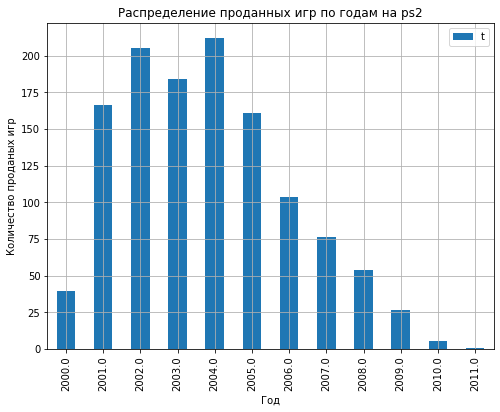

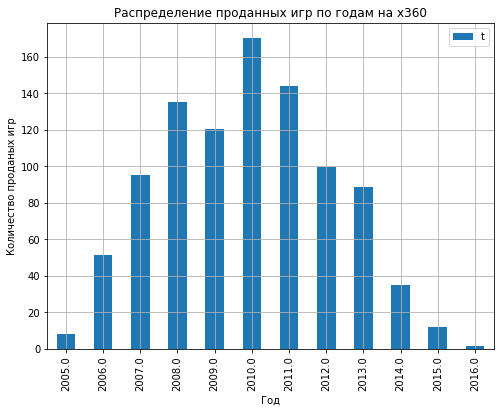

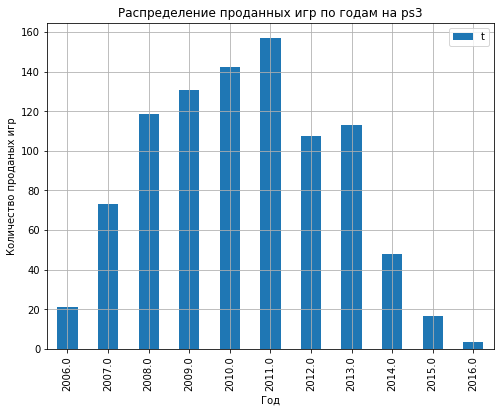

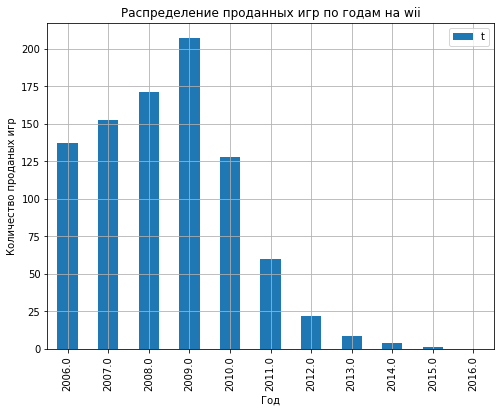

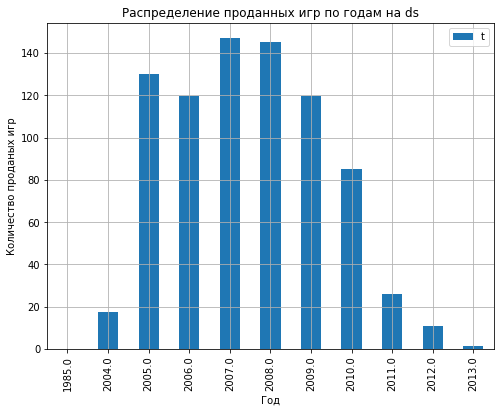

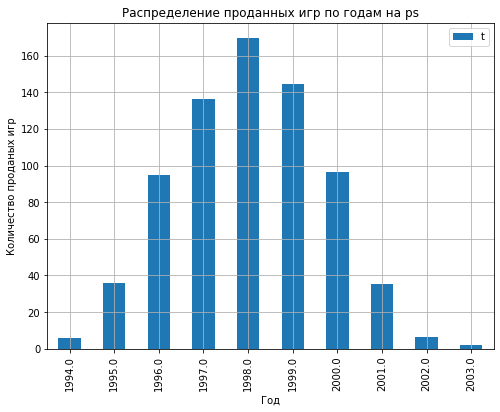

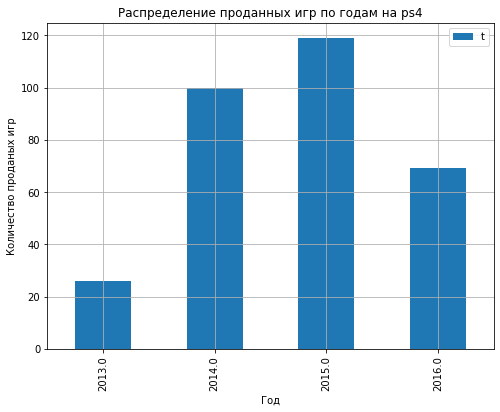

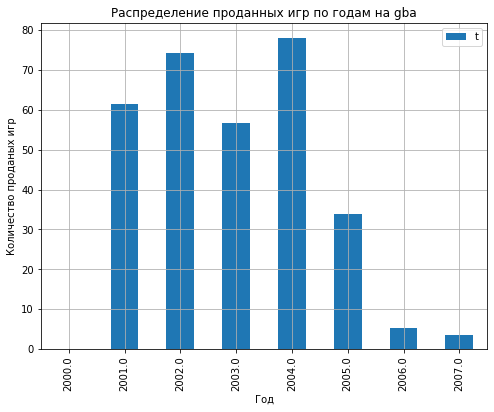

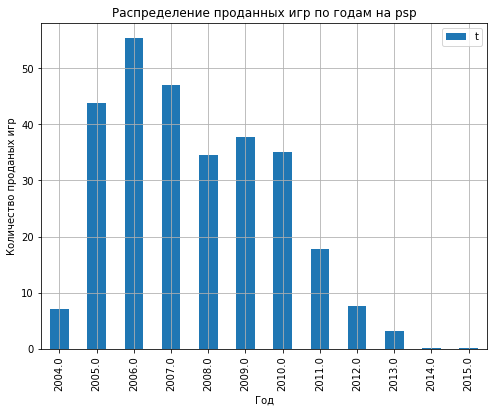

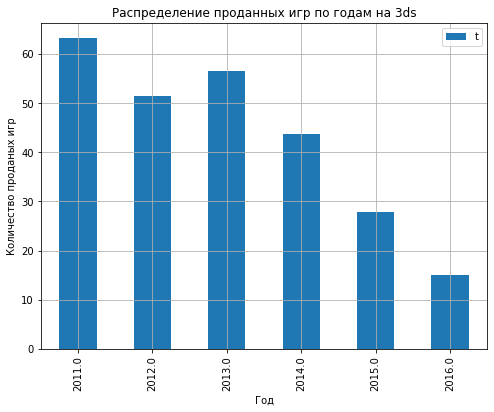

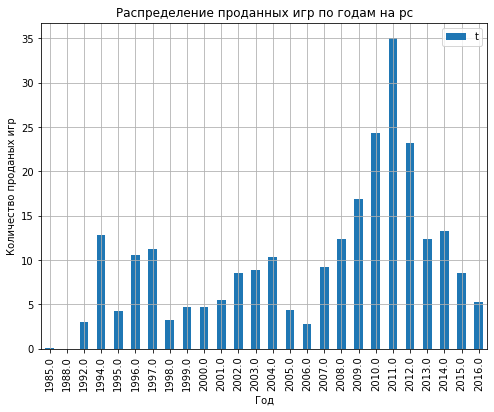

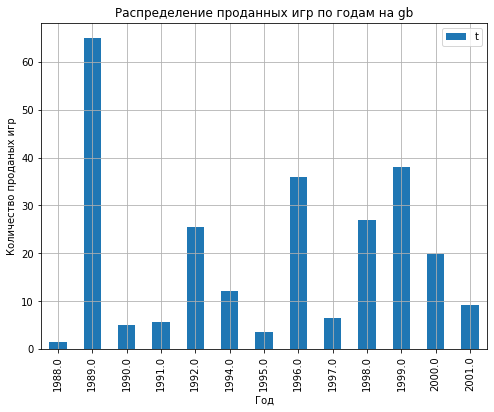

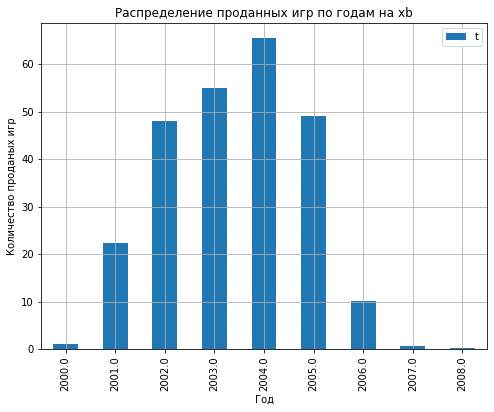

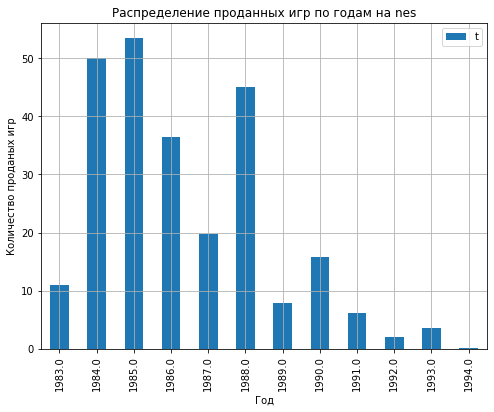

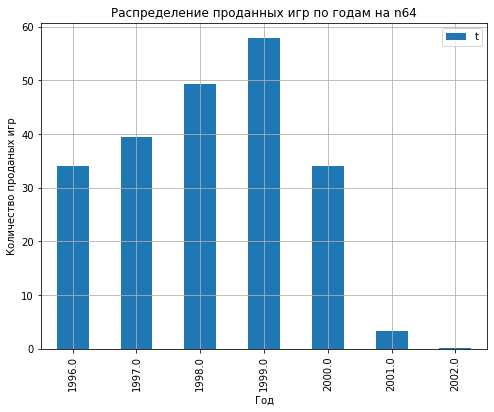

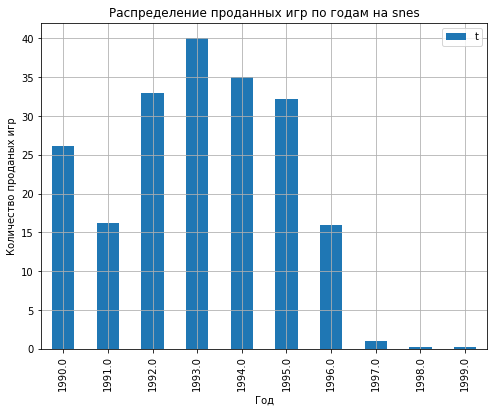

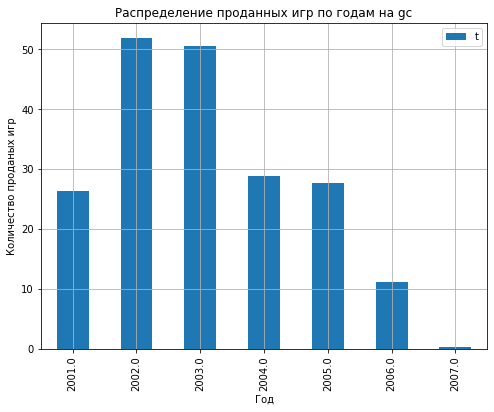

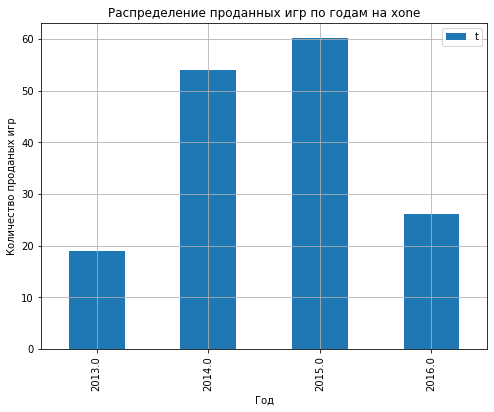

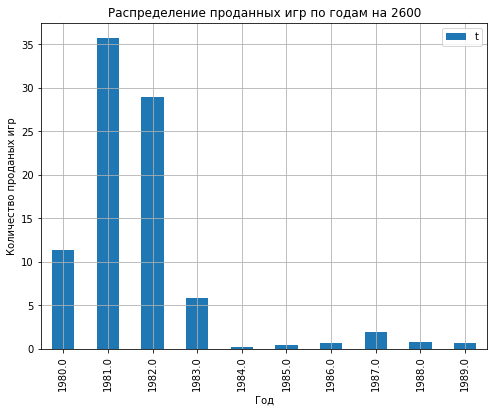

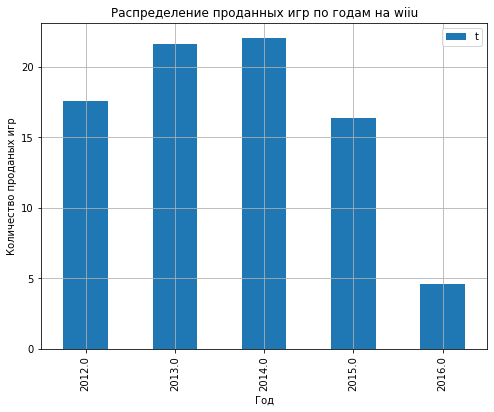

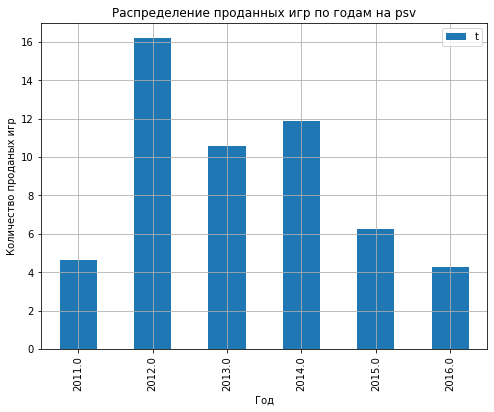

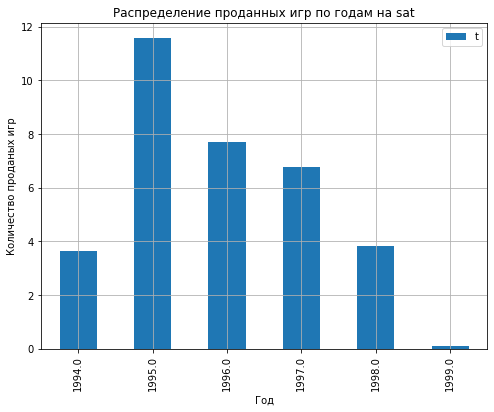

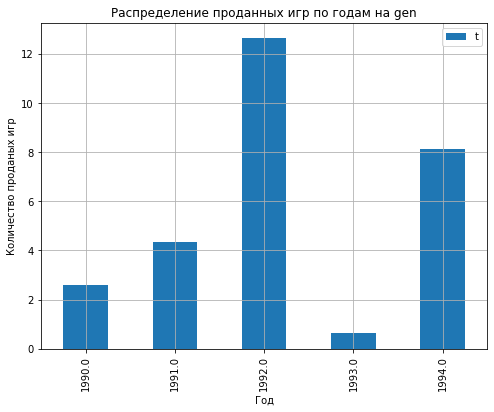

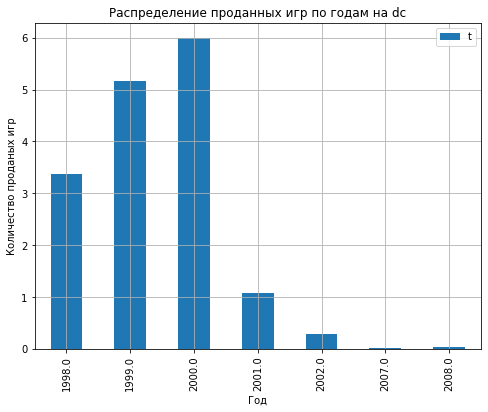

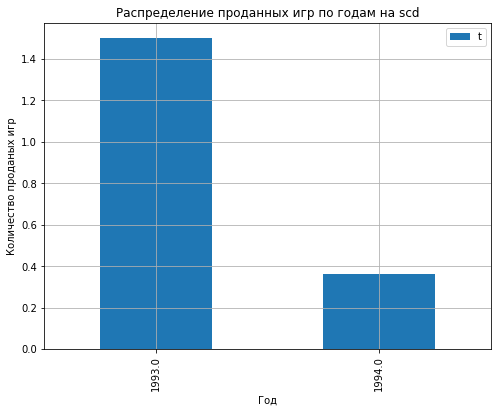

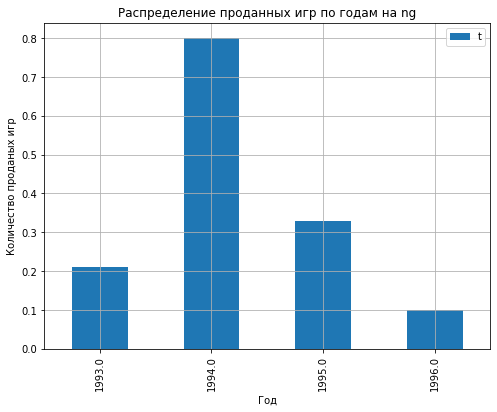

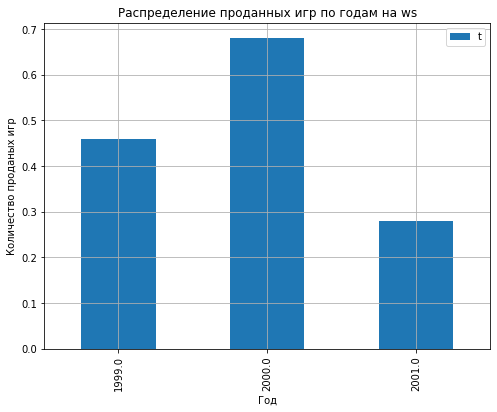

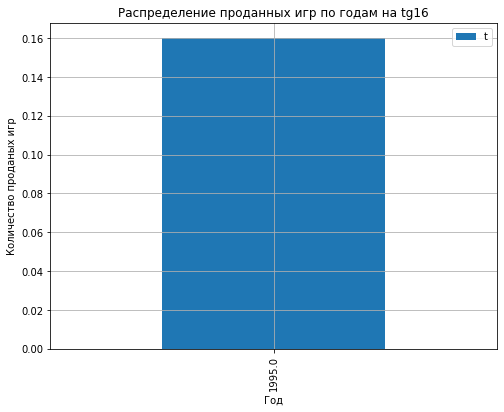

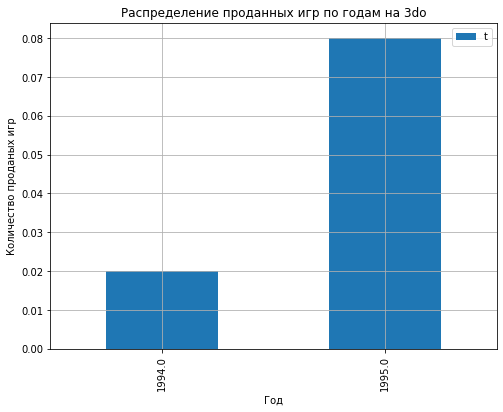

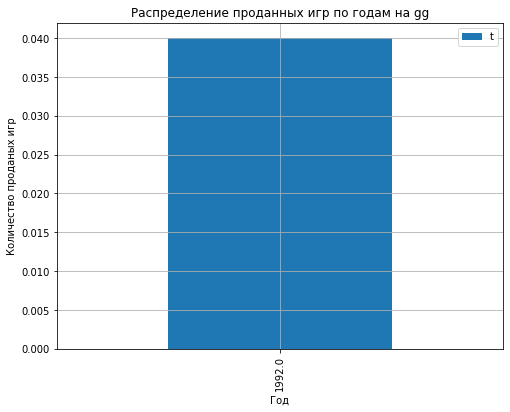

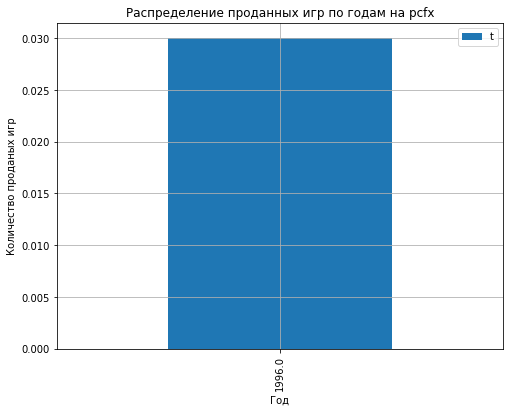

In [14]:
for word in data_platform.index:
    platform_plot(data_games,word)
    

Построили графики распределения продаж для каждой платформы. Большинство графиков подчиняются закоун нормального распределения

In [15]:
data_platform

platform
ps2     1233.56
x360     961.24
ps3      931.34
wii      891.18
ds       802.78
ps       727.58
ps4      314.14
gba      312.88
psp      289.53
3ds      257.81
pc       255.76
gb       254.43
xb       251.57
nes      251.05
n64      218.01
snes     200.04
gc       196.73
xone     159.32
2600      86.48
wiiu      82.19
psv       53.81
sat       33.59
gen       28.35
dc        15.95
scd        1.86
ng         1.44
ws         1.42
tg16       0.16
3do        0.10
gg         0.04
pcfx       0.03
Name: total_sales, dtype: float64

#### По графикам видно, что в среднем активные продажи длятся около 10 лет. Это можно объяснить тем, что выходят новые поколения консолей( как например для Ps и xbox), либо потерей актуальности старых консолей. Несмотря на то, что лидирующие показателя по продажам занимают ps2,x360 и др.,д ля анализа рынка на2017 год отберем следующие платформы: psv, wiiu, xone, pc, 3ds, ps4, так как это более нвоые версии консолей, и на данный момент они занимают лидирующие места по продажам.Так же возьмем период начиная  с 2006 года

In [18]:
top_platform=['psv', 'wiiu', 'xone', 'pc', '3ds', 'ps4']

In [19]:
data_actual=data_games.query('platform == @top_platform and year_of_release>=2013').reset_index(drop=True)

In [20]:
#data_show(data_actual)

#### Для дальнейшего анализа будем использовать БД data_actual. В ней собраны продажи игр для топовых платформ и  год выпуска которых начинается с 2006

Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

(0, 4)

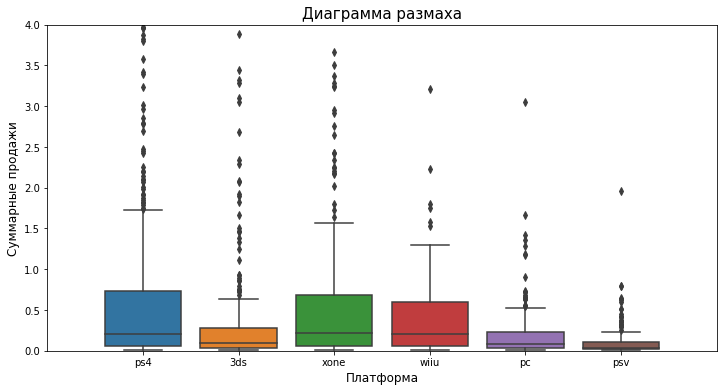

In [21]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data_actual, x='platform', y='total_sales')
plt.title('Диаграмма размаха', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Суммарные продажи',fontsize=12)
plt.xlim(-1,6)
plt.ylim(0,4)

По диаграммам размаха видно, что у каждой платформы бывают выбросы, когда продажи зашкаливают. На всех платформах медианное значение не превышает 1.5 млн

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.

In [23]:
data_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,call of duty: black ops 3,ps4,2015.0,shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
1,pokemon x/pokemon y,3ds,2013.0,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
2,grand theft auto v,ps4,2014.0,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
3,pokemon omega ruby/pokemon alpha sapphire,3ds,2014.0,role-playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
4,fifa 16,ps4,2015.0,sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


In [24]:
data_actual_new=pd.DataFrame()
data_actual_new['platform']=data_actual['platform']
data_actual_new['critic_score']=data_actual['critic_score']
data_actual_new['user_score']=data_actual['user_score']
data_actual_new['total_sales']=data_actual['total_sales']
data_actual_new.sample(10)

,platform,critic_score,user_score,total_sales
1104,psv,NaN,NaN,0.05
58,xone,86.0,6.4,2.95
377,ps4,NaN,NaN,0.40
927,3ds,NaN,4.3,0.08
1093,ps4,66.0,3.8,0.05
625,ps4,74.0,7.6,0.16
1000,ps4,64.0,7.9,0.06
848,3ds,NaN,NaN,0.09
924,psv,NaN,NaN,0.07
15,xone,97.0,7.9,5.47


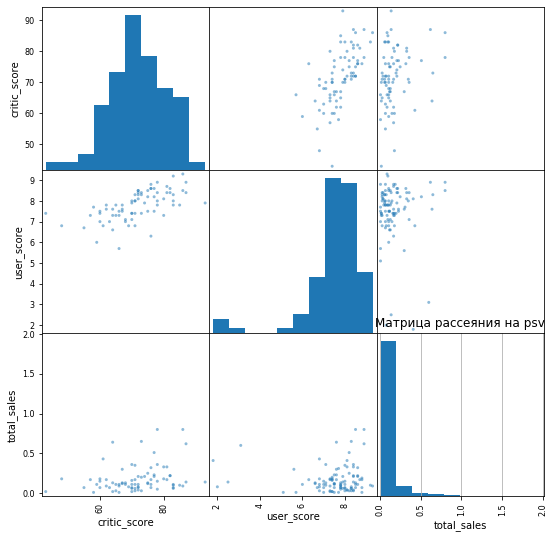

Коэффициент корреляции суммарных продаж от рейтинга критиков на psv 0.25474235030686565
Коэффициент корреляции суммарных продаж от рейтинга игроков на psv 0.0009424723319108626


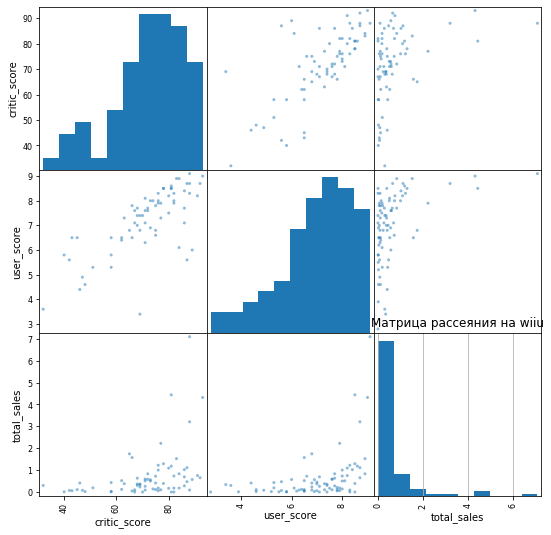

Коэффициент корреляции суммарных продаж от рейтинга критиков на wiiu 0.3764149065423912
Коэффициент корреляции суммарных продаж от рейтинга игроков на wiiu 0.4193304819266187


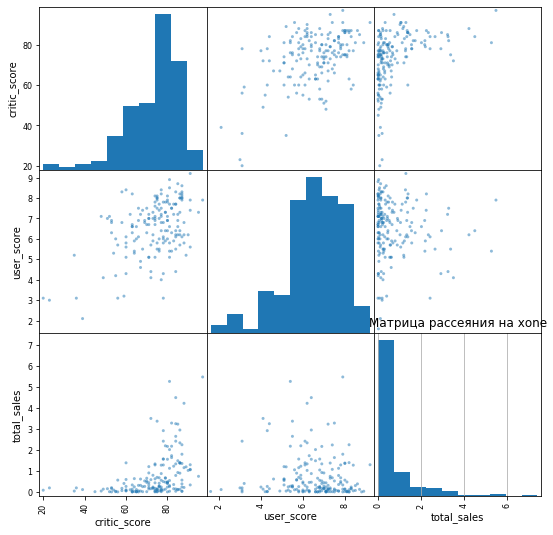

Коэффициент корреляции суммарных продаж от рейтинга критиков на xone 0.41699832800840175
Коэффициент корреляции суммарных продаж от рейтинга игроков на xone -0.06892505328279412


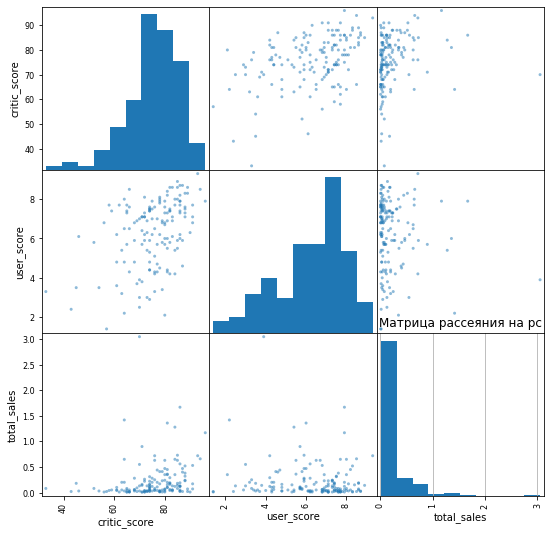

Коэффициент корреляции суммарных продаж от рейтинга критиков на pc 0.19603028294369382
Коэффициент корреляции суммарных продаж от рейтинга игроков на pc -0.09384186952476739


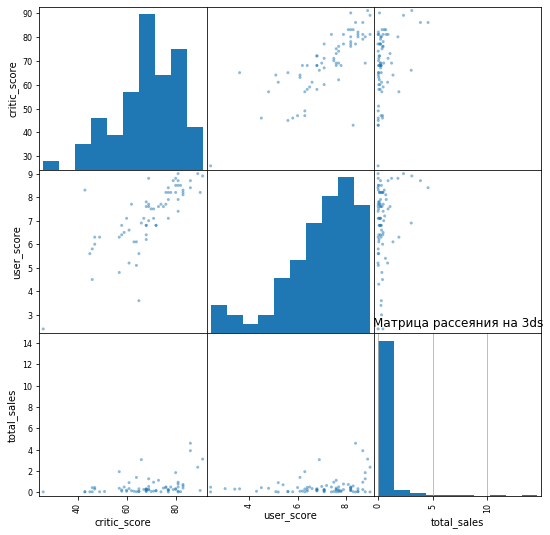

Коэффициент корреляции суммарных продаж от рейтинга критиков на 3ds 0.35705661422881035
Коэффициент корреляции суммарных продаж от рейтинга игроков на 3ds 0.24150411773563016


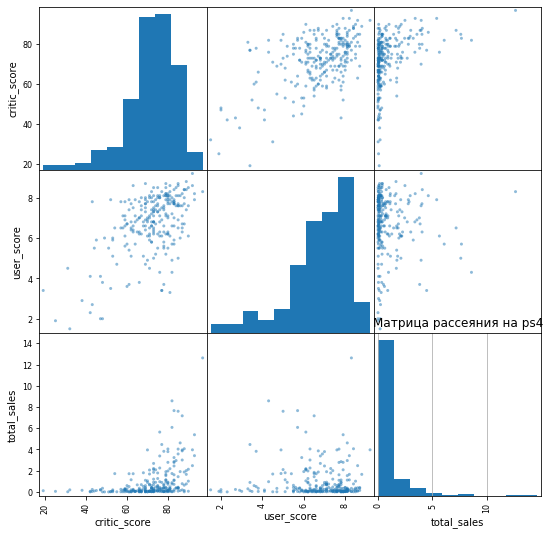

Коэффициент корреляции суммарных продаж от рейтинга критиков на ps4 0.406567902061781
Коэффициент корреляции суммарных продаж от рейтинга игроков на ps4 -0.031957110204556376


In [25]:
for word in ['psv', 'wiiu', 'xone', 'pc', '3ds', 'ps4']:
    data_actual_new1=data_actual_new.query('platform==@word')
    pd.plotting.scatter_matrix(data_actual_new1, figsize=(9, 9))
    plt.title('Матрица рассеяния на {}'.format(word))
    plt.grid(True)
    plt.show()
    print('Коэффициент корреляции суммарных продаж от рейтинга критиков на {}'.format(word), data_actual_new1['total_sales'].corr(data_actual_new1['critic_score']))
    print('Коэффициент корреляции суммарных продаж от рейтинга игроков на {}'.format(word), data_actual_new1['total_sales'].corr(data_actual_new1['user_score']))

Как мы видим, на всех платформах имеется зависимость между рейтингами и продажами, однако кф коррлеяции Пирсона нигде не превышает 0.5, что говорит о неслишком сильной связи. Так же видно, что зависимость от рейтинга игроков меньше влияет на продажи, нежели рейтинги критиков( за исключением wiiu). Это говорит о том, что покупатели больше доверяют критикам, нежели гейймерам. Наиболее сильная зависмость от рейтинга критиков на xone и ps4, наиболее слабая на psv и pc. Наиболее сильная зависимость от рейтинга игроков на wiiu. Наиболее слабая на ps4 и pc.

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [26]:
data_actual['genre'].value_counts()

action          568
role-playing    228
adventure       169
sports          127
shooter         122
misc            112
racing           60
platform         55
simulation       50
strategy         49
fighting         48
puzzle           16
Name: genre, dtype: int64

In [27]:
data_actual.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

genre
action          199.18
shooter         165.71
role-playing    123.94
sports           90.67
misc             34.66
platform         34.22
racing           30.36
fighting         26.69
simulation       19.81
adventure        16.48
strategy          8.91
puzzle            3.13
Name: total_sales, dtype: float64

In [28]:
data_actual.groupby('genre')['total_sales'].mean().sort_values(ascending=False)

genre
shooter         1.358279
sports          0.713937
platform        0.622182
fighting        0.556042
role-playing    0.543596
racing          0.506000
simulation      0.396200
action          0.350669
misc            0.309464
puzzle          0.195625
strategy        0.181837
adventure       0.097515
Name: total_sales, dtype: float64

Самым прибыльным жанром являются экшн, шутер, ролевые игры. Их суммарное количество проданных копией больше 160 млн. Наименее популярыне жанры - пазлы, приключения, стратегии и драки. Их продажи меньше 50 млн копий

### Вывод по исследвоательскому анализу: на данном этапе мы выяснили, платформы, игры на которых будут пользоваться спросом на 2017 год. Посчитали среднее время "жизни" игровой платформы- 10 лет.  Выяснили, что самымми проаваемыми жанрами являются экшн, шутеры и ролевые игры, самыми непоулярными - пазлы, приключения. Так же установили, что оценки критиков и игроков, хоть и не сильно, но влияют на продажи, при это оценки кртитиков имеют более высокий кф корреляции.

### Шаг 4. Составление портрета игроков по странам.<a id="step4"></a>

In [29]:
data_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,call of duty: black ops 3,ps4,2015.0,shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
1,pokemon x/pokemon y,3ds,2013.0,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
2,grand theft auto v,ps4,2014.0,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
3,pokemon omega ruby/pokemon alpha sapphire,3ds,2014.0,role-playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
4,fifa 16,ps4,2015.0,sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


In [30]:
data_na_genre=data_actual.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5) #топ 5 жанров
data_na_platform=data_actual.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)# топ 5 платформ
data_na_rating=data_actual.groupby('rating')['na_sales'].sum().sort_values(ascending=False).head(5)
print(data_na_genre,  data_na_platform,  data_na_rating)


genre
shooter         75.37
action          73.43
role-playing    37.92
sports          37.09
platform        14.18
Name: na_sales, dtype: float64 platform
ps4     108.74
xone     93.12
3ds      38.20
wiiu     29.21
pc       11.11
Name: na_sales, dtype: float64 rating
M       97.05
E       52.37
T       35.07
E10+    32.25
Name: na_sales, dtype: float64


#### В америке самые популярные жанры - экшн,шутер, ролевые игры, спорт и платформинг. Самые популярные платормы - пс4, xone, 3ds,pc,wiiu. Наибольшим спросом пользуются игры рейтинга М(17+) и E(6+). Таким образом можно сказать, что портер американского игрока выглядит слеующим образом: Старше 17 лет, играет в игры жанра экшн и шутеры на ps4 или xone

In [31]:
data_eu_genre=data_actual.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5) #топ 5 жанров
data_eu_platform=data_actual.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)# топ 5 платформ
data_eu_rating=data_actual.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
print(data_eu_genre,  data_eu_platform,  data_eu_rating)

genre
action          73.96
shooter         64.89
sports          38.63
role-playing    32.00
racing          15.18
Name: eu_sales, dtype: float64 platform
ps4     141.09
xone     51.59
3ds      30.96
pc       25.36
wiiu     19.85
Name: eu_sales, dtype: float64 rating
M       94.51
E       58.00
T       32.60
E10+    26.30
Name: eu_sales, dtype: float64


#### В европе самые популярыне жанры- экшн, шутер, ролевые игры, спорт, симуляция. Самые популярыне платформы - ps4,pc,3ds,xone,wiiu. Наибольшим спросом пользуются игры рейтинга М(17+) и E(6+). Таким образом можно сказать, что портер европейского игрока выглядит слеующим образом: Старше 17 лет, играет в игры жанра экшн и шутеры на ps4 или pc

### Портрет американского и европейского игрока во многом совпадает, что неудивительно, тк оба этих региона тесн освязаны между собой в культурной и политической сфере. Однако в Америке xone более популярен чем в Европе. Скорее всего это обусловлено тем, что microsoft- произовдитель xone- американская компания.

In [32]:
data_jp_genre=data_actual.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5) #топ 5 жанров
data_jp_platform=data_actual.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)# топ 5 платформ
data_jp_rating=data_actual.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
print(data_jp_genre,data_jp_platform,data_jp_rating)

genre
role-playing    44.84
action          29.87
misc             8.27
fighting         5.33
platform         4.75
Name: jp_sales, dtype: float64 platform
3ds     67.81
psv     18.59
ps4     15.96
wiiu    10.88
xone     0.34
Name: jp_sales, dtype: float64 rating
T       13.52
E       13.26
M        8.17
E10+     5.66
Name: jp_sales, dtype: float64


#### В японии самые популярыне жанры - ролевые игры, экшн, платформинг, миск, симуляции. Самые популярные платформы - 3ds,psv,ps4,wiiu,xone. Наибольшим спросом пользуются игры с рейтингом E и Т(13+). Портер японского геймера можно описать следующим образом: старше 13 лет, играет в ролевые игры на 3ds  

### Вывод: Портрет американского и европейского игрока во многом совпадает, что неудивительно, тк оба этих региона тесн освязаны между собой в культурной и политической сфере. Однако в Америке xone более популярен чем в Европе. Скорее всего это обусловлено тем, что microsoft- произовдитель xone- американская компания.
### Портрет японского игрока достаотчно сильно отличается от вышеперечисленных. Если судить по рейтингу и жанру игр, то можно предположить, что в японии основная целевая аудитория - это дети подростки (до 18 лет). Так же самая популярная консоль - 3ds, произведенная японской фирмой нинтендо. Это портативная консоль, и, скорее всего, именно она пользуется популярностью у детей-подростков( удобно играть в школе и носить с собой)

## Шаг 5. Проверка гипотез<a id="step5"></a>


Сформулируем нулевую гипотезу Ho:
- Средние пользовательские рейтинги платформ Xbox One и PC   одинаковые

  Альтернативная гипотеза Н1:
- Средние пользовательские рейтинги платформ Xbox One и PC разные

Для проверки будем использовать тест Стьюдента

In [34]:
data_pc=data_actual.query('platform=="pc"')['user_score'].dropna()
data_xone=data_actual.query('platform=="xone"')['user_score'].dropna()
print(data_pc.mean(),data_xone.mean())

6.2696774193548395 6.521428571428572


In [35]:
alpha=.01
results=st.ttest_ind(data_pc,data_xone,equal_var=False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


С высокой долью вероятснотей рейтинги игроков по платфомрам pc и xone одинаковые



Сформулируем нулевые гипотезы:

- Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action и Sports одинаковые
- Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанров Action и Sports различаются



In [36]:
data_action=data_actual.query('genre=="action"')['user_score'].dropna()
data_sports=data_actual.query('genre=="sports"')['user_score'].dropna()
print(data_action.mean(),data_sports.mean())


6.890877192982456 5.5653465346534645


In [37]:
alpha=.01
results=st.ttest_ind(data_action,data_pc,equal_var=False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.00013678335599083368
Отвергаем нулевую гипотезу


В ходе теста отвергли гипотезу о том, что  редние пользовательские рейтинги жанров Action и Sports одинаковые

## Шаг 6: Вывод.<a id="step6"></a>

### По заданию необходимо было првоести анализ рынка компьтерных игр, с целью прогноза продаж на 2017 год. Для этого мы сделали следующие вещи:
### - Провели предобработку данных, в ходе которой добавили суммарыне продажи по всем регионам,  привели все стркои к нижнему регистру и ознакомились с данными. 
### - Провели исследвоательский анализ данных, где отобрали актуальный период времени и актуальный на данный момент платформы. Дальнейшие действия велись с актуальной базой данных. Выяснили, что самымми продаваемыми жанрами являются экшн, шутеры и ролевые игры, самыми непопулярными - пазлы, приключения. Так же установили, что оценки критиков и игроков, хоть и не сильно, но влияют на продажи, при это оценки критиков имеют более высокий кф корреляции.
### - Составили портрет среднего игрока по каждой зоне. Портреты американца и европейца схожи между собой. Однако портер японского игрока отличается от европейского и американского.

### Если рассчитывать парогноз на 2017г, то правильнее всего будет продавать игры рейтинга М(17+) жанра экшн или шутер на ps4
